In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pltq

In [2]:
df = pd.read_csv("../data/raw/iris.m", header=None)

In [3]:
X = df.iloc[:, 0:4].values
y = df.iloc[:, -1].values

In [4]:
X = np.hstack([X, np.ones((len(X), 1))])  # adiciona bias
d = X.shape[1]  # quantidade de features
k = len(np.unique(y))  # quantidade de classes

In [5]:
# prepara o Y para multiclasse
unique_classes = list(np.unique(y))
Ytr = np.zeros((len(X), k))

for i, yi in enumerate(y):
    classindex = unique_classes.index(yi)
    Ytr[i][classindex] = 1

---

## Softmax regression

In [240]:
def softmax(Ŷ):
    expY = np.exp(Ŷ - Ŷ.max())
    return  expY / np.sum(expY, axis=1).reshape(150, 1)

def cross_entropy(Ytr, Ŷ):
    return -np.sum(np.multiply(Ytr, np.log(Ŷ)))

In [265]:
def h(X, W, grad, alpha):
    Wi = W + alpha * (-grad)
    Ŷi = softmax(X @ Wi.T)
    return Ŷi

In [266]:
def hl(X, W, grad, alpha):
    Ŷ = h(X, W, grad, alpha)
    grad_h = (Ŷ - Ytr).T @ X
    return np.dot(grad_h.flatten().T, (-grad).flatten())

In [286]:
def bissecao(X, W, grad):
    
    al = 0  # isso vai ser sempre negativo
    ar = np.random.rand()  # pode ou não ser positivo
    
    while hl(X, W, grad, ar) < 0:
        ar = 2*ar
    
    am = (al + ar) / 2
    print(am)
    
    while abs(hl(X, W, grad, am)) > 1e-4:
        
        # print(hl(X, W, grad, am))
        print(am)
        
        if hl(X, W, grad, am) > 0:
            ar = am
        elif hl(X, W, grad, am) < 0:
            al = am
        else:
            return am
        
        am = (al + ar) / 2

    return am

In [287]:
W = np.random.rand(k, d)
Ŷ = softmax(X @ W.T)
cross_entropy(Ytr, Ŷ)
grad = (Ŷ - Ytr).T @ X

In [288]:
cross_entropy(Ytr, Ŷ)

225.68983401415306

In [289]:
alpha = bissecao(X, W, grad)

0.32530811300282453
0.32530811300282453
0.16265405650141226
0.08132702825070613
0.040663514125353066
0.020331757062676533
0.010165878531338267
0.005082939265669133
0.0025414696328345666
0.0012707348164172833
0.0006353674082086417
0.00031768370410432083
0.0004765255561564812
0.000397104630130401
0.0004368150931434411
0.00045667032464996116
0.00044674270889670113
0.00044177890102007115
0.0004392969970817561
0.0004380560451125986
0.0004386765210971774
0.0004389867590894668
0.0004388316400933221
0.00043875408059524973
0.0004387928603442859
0.0004387734704697678
0.00043876377553250876
0.0004387686230011383
0.00043877104673545304
0.0004387698348682957
0.0004387704408018744
0.00043877013783508504
0.00043876998635169036
0.0004387700620933877
0.000438770024222539
0.0004387700052871147
0.0004387699958194025
0.0004387700005532586


/tmp/ipykernel_7248/3346494963.py:3: RuntimeWarning: invalid value encountered in divide
  return  expY / np.sum(expY, axis=1).reshape(150, 1)


In [307]:
Wi = W - .5*grad

In [308]:
Yi = X @ Wi.T

In [309]:
np.exp((Yi - Yi.max()))

array([[0.00000000e+000, 2.62810873e-252, 6.56629953e-246],
       [0.00000000e+000, 1.43336753e-258, 3.01006265e-249],
       [0.00000000e+000, 8.38113827e-262, 1.51664827e-255],
       [0.00000000e+000, 1.60659871e-261, 8.18400331e-251],
       [0.00000000e+000, 2.67578384e-253, 1.80775529e-247],
       [0.00000000e+000, 1.19875350e-240, 1.10153552e-228],
       [0.00000000e+000, 1.31780626e-260, 1.68311167e-252],
       [0.00000000e+000, 2.84169712e-253, 2.35544543e-244],
       [0.00000000e+000, 3.37105999e-267, 3.09374715e-257],
       [0.00000000e+000, 4.86967289e-257, 1.95082683e-247],
       [0.00000000e+000, 5.02629716e-245, 6.77922889e-238],
       [0.00000000e+000, 3.12838319e-255, 2.32618556e-244],
       [0.00000000e+000, 1.67530678e-260, 3.09253019e-252],
       [0.00000000e+000, 2.88911619e-272, 1.00330994e-269],
       [0.00000000e+000, 1.59554362e-240, 5.73194288e-241],
       [0.00000000e+000, 2.80633589e-235, 4.14443334e-230],
       [0.00000000e+000, 1.21352879e-245

In [306]:
softmax(X @ Wi.T)

/tmp/ipykernel_7248/3346494963.py:3: RuntimeWarning: invalid value encountered in divide
  return  expY / np.sum(expY, axis=1).reshape(150, 1)


array([[            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan,             nan],
       [            nan,             nan

In [284]:
alpha

0.3606860320116076

In [224]:
loss_values = []

In [225]:
grad_norm = np.linalg.norm(grad.flatten())

it = 0
while grad_norm > 1e-3 and it <= 1000:
    alpha = bissecao(X, W, grad)
    W = W - alpha * grad
    Ŷ = softmax(X @ W.T)
    grad = (Ŷ - Ytr).T @ X
    grad_norm  = np.linalg.norm(grad.flatten())

    loss = cross_entropy(Ytr, Ŷ)
    loss_values.append(loss)

    it += 1
    print(f"it: {it}, grad_norm: {grad_norm}, cross_entropy: {loss}")

KeyboardInterrupt: 

In [176]:
loss_values

[]

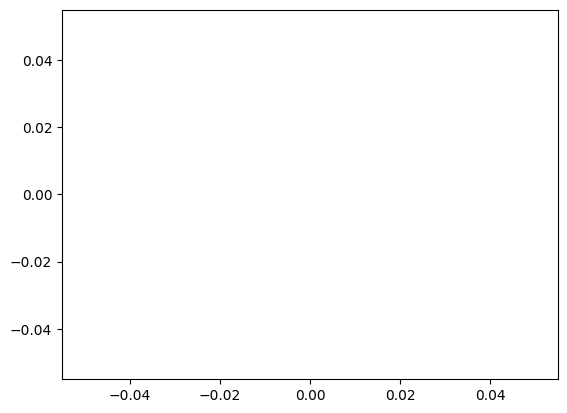

In [175]:
plt.plot(loss_values)